<div style="text-align: center;">
    
# **DEMO - CS4619 Assignment, 2025**
#### **Alexander Goodison (Student Number: 121308756)**

<p style="text-align: center;">
    The following is my submission for the demo section of the CS4619 Assignment. Unless otherwise cited, all work is my own or derived from the course lectures.</p>
</div>

<hr />
&nbsp

### **Notebook Setup**

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [22]:
import os

if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive')
  base_dir = "./drive/My Drive/Colab Notebooks/"
else:
  base_dir = "."

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Load + compile model
model = load_model(os.path.join(base_dir, "best_network.keras"))
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [24]:
# Helper function used to display images used in each section
def display_images(image_paths):
    images = [Image.open(img) for img in image_paths]
    _, axes = plt.subplots(1, 4, figsize=(12, 4))

    # Show images on the available axes
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis("off")

    # Turn off the axis for any unused axes
    for ax in axes[len(images):]:
        ax.axis("off")

    plt.tight_layout()

<hr />
&nbsp

### **Tennis Court**
One of the images selected features a tennis court. My initial thoughts were that the model may possible confuse the blue of the tennis courts and/or its shape for a pool. But it gets it right and determines that no pool is present. (Although it is close to predicting it as a pool)

**Note:** a prediction >= 0.5 indicates the model determines there is a pool present and < 0.5 means there is likely no pool present.

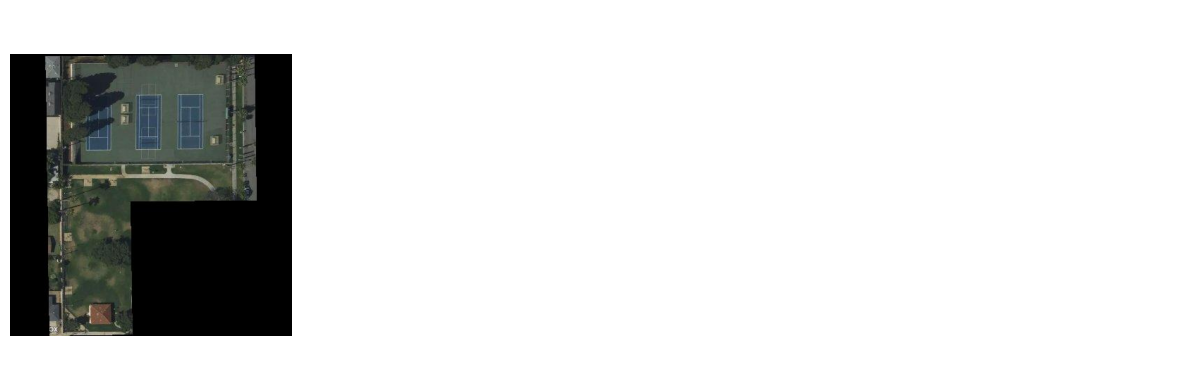

In [25]:
display_images([
    os.path.join(base_dir, "assets/examples/4014007901.jpg")
])

In [26]:
img = image.load_img(os.path.join(base_dir, "assets/examples", "4014007901.jpg"), target_size=(400,400))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)
print(classes[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
0.43672588


<hr />
&nbsp

### **Small Pool**
Below is an example of an image where the pool is quite small relative to the size of the image itself. The pool is also partly covered by shadows from the neighbouring buildings. But the model is still able to pick up there is a pool present. Maybe this is an unfair example to give the model, as most of what it was trained on were single-family homes - this image appears to include an apartment complex.

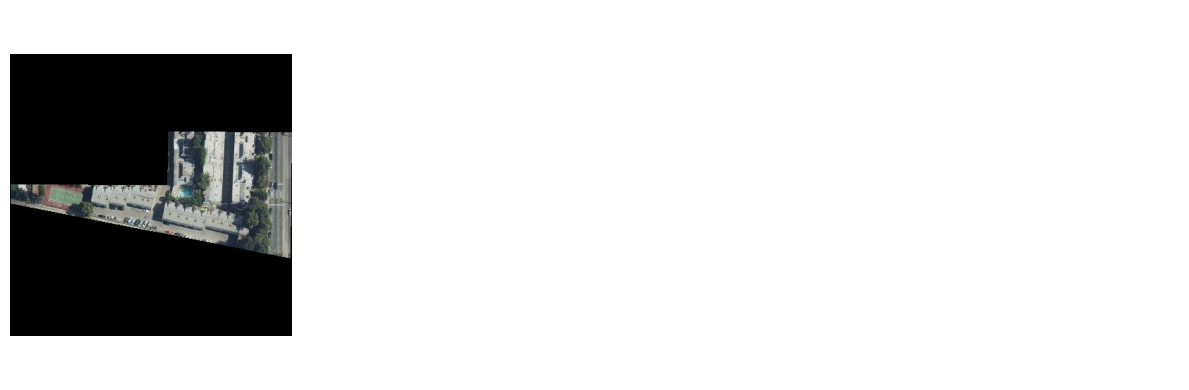

In [27]:
display_images([
    os.path.join(base_dir, "assets/examples/2690022044.jpg")
])

In [28]:
img = image.load_img(os.path.join(base_dir, "assets/examples", "2690022044.jpg"), target_size=(400,400))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)
print(classes[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
0.9897339


<hr />
&nbsp

### **Shape & Colour**
It is fair to say that the model uses a combination of the pool's colour and shape to determine if the satellite image actually contains a pool. Below are four examples of where this can be seen.

(From left to right)
- **Image 1:** The pool here is cut off by the masking of the property boundaries. It has the appropriate colour, but this is not sufficient and the model gives an incorrect classification.

- **Image 2:** The pool is a vibrant blue colour, which is a contrast to the rest of the image. It is slightly covered, but has a curvy shape common with residential pools. The model correctly predicts this one.

- **Image 3:** This pool in this image is quite dark, and slightly blends in with the rest of the image, so the model has a hard time picking up that there is even a pool there. Hence, the model gets this one wrong.

- **Image 4:** Again, the pool here is dark, but possibly as it contrasts with the ground around it better, the model is better able to pick it up. Plus, instead of having straight edges like image 3, it is a more curved pool, which seems to be an indicator that the model uses.

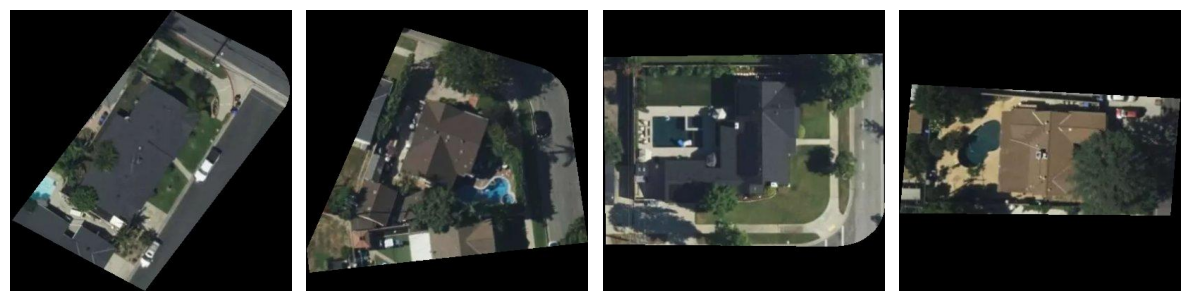

In [29]:
image_paths = [
    os.path.join(base_dir, "assets/examples/6259003024.jpg"),
    os.path.join(base_dir, "assets/examples/7070005007.jpg"),
    os.path.join(base_dir, "assets/examples/8303023010.jpg"),
    os.path.join(base_dir, "assets/examples/8440005006.jpg"),
]

display_images(image_paths)

In [30]:
batch = []

# Loop through each image path, load, and process the image
for img_path in image_paths:
    img = image.load_img(img_path, target_size=(400,400))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    batch.append(img_array)


batch = np.vstack(batch) # Stack all images into a single batch for model prediction
predictions = model.predict(batch)

# Print the prediction for each image
for i, pred in enumerate(predictions):
    print(f"Image {i + 1}: {pred[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Image 1: 0.0014522812562063336
Image 2: 0.999453067779541
Image 3: 0.19179096817970276
Image 4: 0.635175347328186


<hr />
&nbsp

### **Conclusion**
This model is satisfyingly accurate at detecting the presence of a pool in satellite images of homes in Los Angeles County. It is best if the pool is light blue in colour, has curved edges, contrasts well with the ground around it and is in full view in the picture. It may be worthwhile testing this model with satellite images elsewhere in the US, or in fact, the world. But for the sake of this assignment, I'm happy with the outcome.